In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as shc

In [5]:
X = pd.read_csv('./credit_card.csv')
  
# Removendo o CUST_ID do dataset
X = X.drop('CUST_ID', axis = 1)
  
X.fillna(method ='ffill', inplace = True)

# Escalando os dados para que sejam melhor comparáveis
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
  
# Normalizando o dataset
X_normalized = normalize(X_scaled)
  
# Convertendo em um data frame
X_normalized = pd.DataFrame(X_normalized)

# Reduzindo a dimensão dos dados
pca = PCA(n_components = 2)
X_principal = pca.fit_transform(X_normalized)
X_principal = pd.DataFrame(X_principal)
X_principal.columns = ['P1', 'P2']

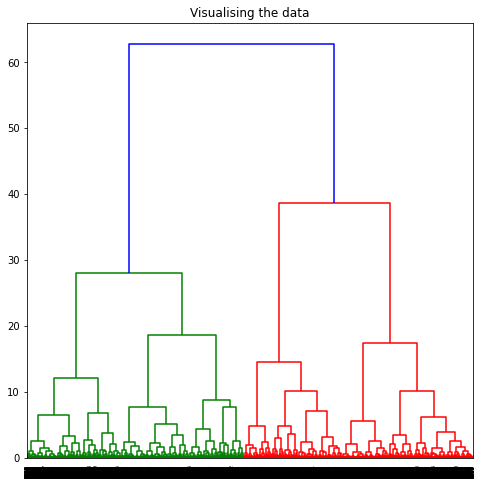

In [6]:
plt.figure(figsize =(8, 8))
plt.title('Visualising the data')
Dendrogram = shc.dendrogram((shc.linkage(X_principal, method ='ward')))